## Data set: Heart Rate for Emotion Recognition

## Date: 04rd Nov 2022

## Written By Khatoon Khedri



 ![HeartReate](https://www.wareable.com/media/images/2018/01/apple-watch-diagram-1514903846-sh5z-column-width-inline.jpg)
 ![Simul](https://www.apple.com/newsroom/ca/images/product/apps/standard/Apple-Watch-ECG-app-12062018_big.gif.large.gif)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from IPython.display import display, Markdown
import plotly.graph_objs as go
import plotly.offline as py
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
files = os.path.join("ER_dataset/", "*.csv")
files = glob.glob(files)

In [4]:
df = pd.concat(map(pd.read_csv, files))

df

# condition  emotion      data  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0                0        1 -1.338675    2.659099    2.255221  -22.680000   
1                0        1 -3.683902    0.528873    1.629979  -78.680000   
2                0        1 -1.524828   -0.549344   -0.750015   18.690001   
3                0        1  0.154575    0.575081    0.397316   99.750000   
4                0        1  1.919233    1.803874    0.560964  127.120003   
...            ...      ...       ...         ...         ...         ...   
19951            0        1  0.622317    0.479167   -2.299460  -43.189999   
19952            0        1  2.094345    2.502418   -0.578072    8.330000   
19953            0        1 -0.273239    1.967478   -0.075777   20.090000   
19954            0        1 -0.431073   -0.516388   -1.191948    9.170000   
19955            0        1  0.484015   -2.183799    0.242853   40.320000   

       Unnamed: 6  Unnamed: 7  Unnamed: 8  
0      -19.950001  179.479996          91  
1     -104.510002  172.830002          91  
2      -93.730003  138.110001          91  
3      -21.280001   77.000000          91  
4      -13.790000   60.340000          91  
...           ...         ...         ...  
19951  -56.910000  -34.930000          94  
19952  -19.040001  -36.259998          94  
19953   20.719999  -19.040001          94  
19954   28.770000   -5.040000          94  
19955   14.140000    0.280000          94  

[648998 rows x 9 columns]

#  Rename Columns
We rename columns, because it makes confusing to identify. We will try to rename this column to make it easily understandable.

In [5]:
df.columns = ['# condition','emotion','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7']
df

# condition  emotion  Feature 1  Feature 2  Feature 3   Feature 4  \
0                0        1  -1.338675   2.659099   2.255221  -22.680000   
1                0        1  -3.683902   0.528873   1.629979  -78.680000   
2                0        1  -1.524828  -0.549344  -0.750015   18.690001   
3                0        1   0.154575   0.575081   0.397316   99.750000   
4                0        1   1.919233   1.803874   0.560964  127.120003   
...            ...      ...        ...        ...        ...         ...   
19951            0        1   0.622317   0.479167  -2.299460  -43.189999   
19952            0        1   2.094345   2.502418  -0.578072    8.330000   
19953            0        1  -0.273239   1.967478  -0.075777   20.090000   
19954            0        1  -0.431073  -0.516388  -1.191948    9.170000   
19955            0        1   0.484015  -2.183799   0.242853   40.320000   

        Feature 5   Feature 6  Feature 7  
0      -19.950001  179.479996         91  
1     -104.510002  172.830002         91  
2      -93.730003  138.110001         91  
3      -21.280001   77.000000         91  
4      -13.790000   60.340000         91  
...           ...         ...        ...  
19951  -56.910000  -34.930000         94  
19952  -19.040001  -36.259998         94  
19953   20.719999  -19.040001         94  
19954   28.770000   -5.040000         94  
19955   14.140000    0.280000         94  

[648998 rows x 9 columns]

# Check out Missing Values

In [44]:
#view basic stats information on data
df.describe()

# condition        emotion      Feature 1      Feature 2  \
count  648998.000000  648998.000000  648998.000000  648998.000000   
mean        0.969112      -0.000351      -0.001486      -0.000316   
std         0.827098       0.816677       1.912070       1.764197   
min         0.000000      -1.000000     -31.931080     -31.652325   
25%         0.000000      -1.000000      -1.117949      -1.047408   
50%         1.000000       0.000000      -0.002367       0.011737   
75%         2.000000       1.000000       1.128564       1.032658   
max         2.000000       1.000000      42.823997      31.638508   

           Feature 3      Feature 4      Feature 5      Feature 6  \
count  648998.000000  648998.000000  648998.000000  648998.000000   
mean       -0.000632      -1.831748       0.475176       1.720212   
std         1.329373      91.743785      62.062532     111.971341   
min       -32.722332   -1876.209961    -903.489990   -1029.839966   
25%        -0.726843     -43.049999     -30.309999     -49.349998   
50%        -0.006636      -1.400000       0.210000       2.730000   
75%         0.725245      40.250000      30.799999      51.799999   
max        26.596994    2034.550049     741.159973    1005.410034   

           Feature 7  
count  648998.000000  
mean       97.414063  
std        30.647844  
min         0.000000  
25%        91.000000  
50%       104.000000  
75%       112.000000  
max       224.000000

In [43]:
# Check out data types, missing values and more
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648998 entries, 0 to 19955
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   # condition  648998 non-null  int64  
 1   emotion      648998 non-null  int64  
 2   Feature 1    648998 non-null  float64
 3   Feature 2    648998 non-null  float64
 4   Feature 3    648998 non-null  float64
 5   Feature 4    648998 non-null  float64
 6   Feature 5    648998 non-null  float64
 7   Feature 6    648998 non-null  float64
 8   Feature 7    648998 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 49.5 MB

Shape of the dataset
Number of Features: 9
Number of Observations: 648998


In [42]:
# Check missing values
df.isnull().sum()

# condition    0
emotion        0
Feature 1      0
Feature 2      0
Feature 3      0
Feature 4      0
Feature 5      0
Feature 6      0
Feature 7      0
dtype: int64



As we can see above, this dataset does not have any null or missing value. This time we can skip the data cleaning procedure.


 ## Exploratory Data Analysis (EDA)

Now we explore this dataset to understand what it looks like and check out statistics by using visualization technique.

 Target Variable = Emotion

Emotion is a target variable for the heart disease. We will look at the number and proportion of each Condition vablues by pie chart.

In [6]:
def emotion_ratio(data):
    """
    Make a pie chart of 'Emotion' values

    """
    results = df['emotion'].value_counts()
    values = [results[-1], results[0], results[1]]
    labels = ['-1', '0', '1']
    colors = ['MediumSeaGreen', 'Coral', 'red']
    
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    plt.savefig("ratio.png")
    return py

emotion_ratio(df)

<module 'plotly.offline' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\plotly\\offline\\__init__.py'>

<Figure size 432x288 with 0 Axes>


### Observations

    All Emotions have same proportion. 

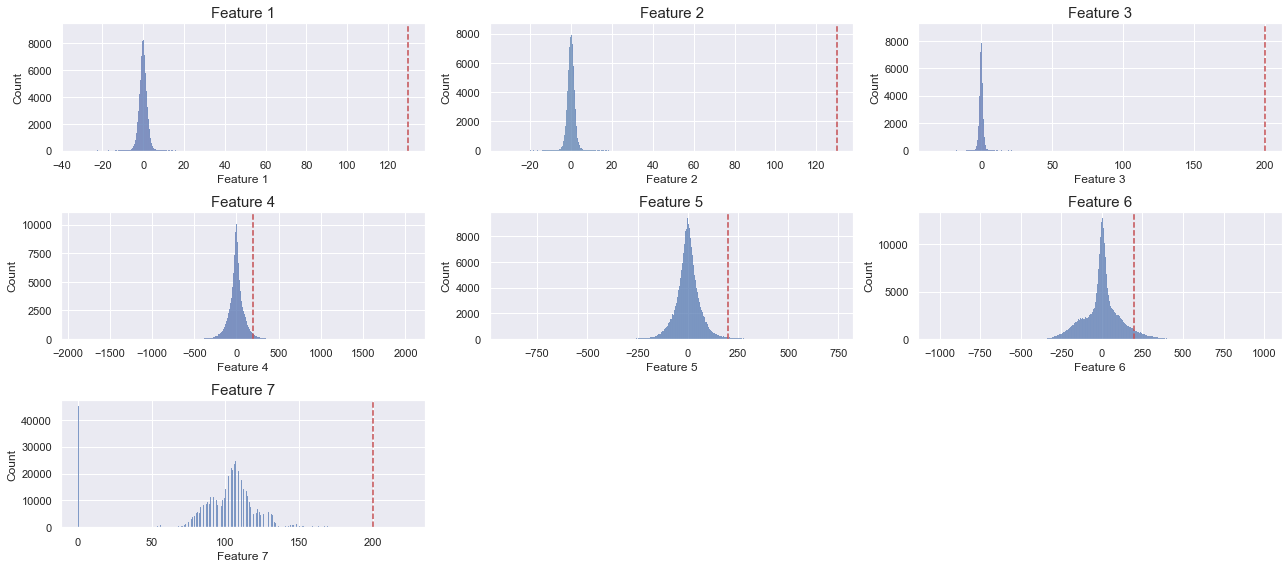

In [25]:
def features_dist(data):
    """
    Show distributions of all feature
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Feature 1
    plt.subplot(3, 3, 1)
    sns.histplot(data['Feature 1'])
    plt.title('Feature 1', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    # Feature 2
    plt.subplot(3, 3, 2)
    sns.histplot(data['Feature 2'])
    plt.title('Feature 2', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--')
     
        
        
   # Feature 3
    plt.subplot(3, 3, 3)
    sns.histplot(data['Feature 3'])
    plt.title('Feature 3', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 4
    plt.subplot(3, 3, 4)
    sns.histplot(data['Feature 4'])
    plt.title('Feature 4', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
  
    
    # Feature 5
    plt.subplot(3, 3, 5)
    sns.histplot(data['Feature 5'])
    plt.title('Feature 5', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 6
    plt.subplot(3, 3, 6)
    sns.histplot(data['Feature 6'])
    plt.title('Feature 6', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
    
    
    # Feature 7
    plt.subplot(3, 3, 7)
    sns.histplot(data['Feature 7'])
    plt.title('Feature 7', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--')
  

    plt.tight_layout()
    plt.savefig("dictribution.png")
    plt.show()
    
    
features_dist(df)



### Observations

Apparently all features expect feature  7 is quite close to a normal distribution.
The average of them are approxmatly to zero. It seems to me that fearture  7 follow a right-skewed distribution (lognormal).



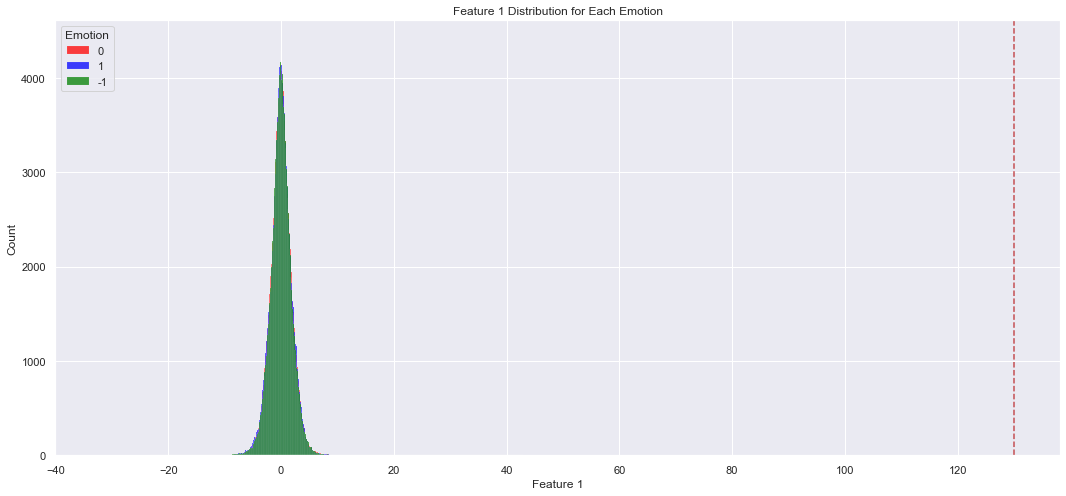

In [47]:
    fig = plt.figure(figsize=(18,8))

    
    Feat1_emo0 = df[df['emotion']==0]['Feature 1']
    Feat1_emo1 = df[df['emotion']==1]['Feature 1']
    Feat1_emo_1 = df[df['emotion']==-1]['Feature 1']
    sns.histplot(Feat1_emo0, color='Red')   
    sns.histplot(Feat1_emo1, color='Blue')
    sns.histplot(Feat1_emo_1, color='Green')
    plt.title('Feature 1 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')

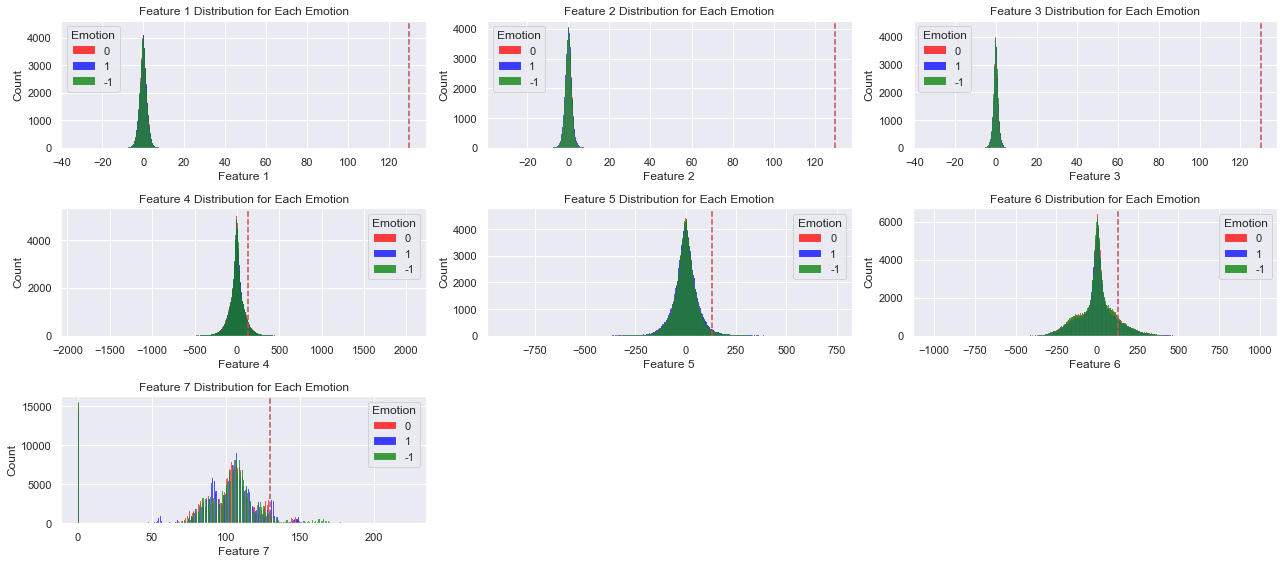

In [40]:
def features_dist_emotion(data):
    """
    Show distributions of all featurs for each emotions
    """
    fig = plt.figure(figsize=(18,8))
    
    # Feature 1
    plt.subplot(3, 3, 1)
    Feat1_emo0 = data[data['emotion']==0]['Feature 1']
    Feat1_emo1 = data[data['emotion']==1]['Feature 1']
    Feat1_emo_1 = data[data['emotion']==-1]['Feature 1']
    sns.histplot(Feat1_emo0, color='Red')   
    sns.histplot(Feat1_emo1, color='Blue')
    sns.histplot(Feat1_emo_1, color='Green')
    plt.title('Feature 1 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    # Feature 2
    plt.subplot(3, 3, 2)
    Feat2_emo0 = data[data['emotion']==0]['Feature 2']
    Feat2_emo1 = data[data['emotion']==1]['Feature 2']
    Feat2_emo_1 = data[data['emotion']==-1]['Feature 2']
    sns.histplot(Feat2_emo0, color='Red')   
    sns.histplot(Feat2_emo1, color='Blue')
    sns.histplot(Feat2_emo_1, color='Green')
    plt.title('Feature 2 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    # Feature 3
    plt.subplot(3, 3, 3)
    Feat3_emo0 = data[data['emotion']==0]['Feature 3']
    Feat3_emo1 = data[data['emotion']==1]['Feature 3']
    Feat3_emo_1 = data[data['emotion']==-1]['Feature 3']
    sns.histplot(Feat3_emo0, color='Red')   
    sns.histplot(Feat3_emo1, color='Blue')
    sns.histplot(Feat3_emo_1, color='Green')
    plt.title('Feature 3 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    

    
  # Feature 4
    plt.subplot(3, 3, 4)
    Feat4_emo0 = data[data['emotion']==0]['Feature 4']
    Feat4_emo1 = data[data['emotion']==1]['Feature 4']
    Feat4_emo_1 = data[data['emotion']==-1]['Feature 4']
    sns.histplot(Feat4_emo0, color='Red')   
    sns.histplot(Feat4_emo1, color='Blue')
    sns.histplot(Feat4_emo_1, color='Green')
    plt.title('Feature 4 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    # Feature 5
    plt.subplot(3, 3, 5)
    Feat5_emo0 = data[data['emotion']==0]['Feature 5']
    Feat5_emo1 = data[data['emotion']==1]['Feature 5']
    Feat5_emo_1 = data[data['emotion']==-1]['Feature 5']
    sns.histplot(Feat5_emo0, color='Red')   
    sns.histplot(Feat5_emo1, color='Blue')
    sns.histplot(Feat5_emo_1, color='Green')
    plt.title('Feature 5 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
     # Feature 6
    plt.subplot(3, 3, 6)
    Feat6_emo0 = data[data['emotion']==0]['Feature 6']
    Feat6_emo1 = data[data['emotion']==1]['Feature 6']
    Feat6_emo_1 = data[data['emotion']==-1]['Feature 6']
    sns.histplot(Feat6_emo0, color='Red')   
    sns.histplot(Feat6_emo1, color='Blue')
    sns.histplot(Feat6_emo_1, color='Green')
    plt.title('Feature 6 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
     # Feature 7
    plt.subplot(3, 3, 7)
    Feat7_emo0 = data[data['emotion']==0]['Feature 7']
    Feat7_emo1 = data[data['emotion']==1]['Feature 7']
    Feat7_emo_1 = data[data['emotion']==-1]['Feature 7']
    sns.histplot(Feat7_emo0, color='Red')   
    sns.histplot(Feat7_emo1, color='Blue')
    sns.histplot(Feat7_emo_1, color='Green')
    plt.title('Feature 7 Distribution for Each Emotion')
    plt.gca().legend(title='Emotion', labels=['0','1', '-1'])
    plt.axvline(x=130, color='r', linestyle='--')
    
    
    plt.tight_layout()
    plt.show()
    
    
features_dist_emotion(df);

## correlation matrix

A correlation matrix is a tabular data representing the correlations between pairs of variables in a given data.The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.There are several types of correlation coefficients, but the most common of them all is the  Pearsons coefficient.

<img src="cov-p.png"  />

The value of ρ lies between -1 and +1.
Values nearing +1 indicate the presence of a strong positive relation between X and Y, whereas those nearing -1 indicate a strong negative relation between X and Y.
Values near to zero mean there is an absence of any relationship between X and Y.

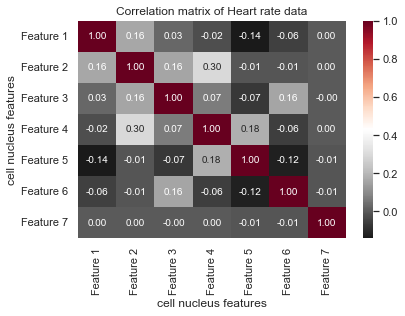

In [22]:

df_small = df.iloc[:,2:9]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True,fmt='.2f', cmap='RdGy_r')
plt.title("Correlation matrix of Heart rate data")
plt.xlabel("High Level features")
plt.ylabel("High Level features")
plt.savefig("Heart_Rate_correlation.png")
plt.show()

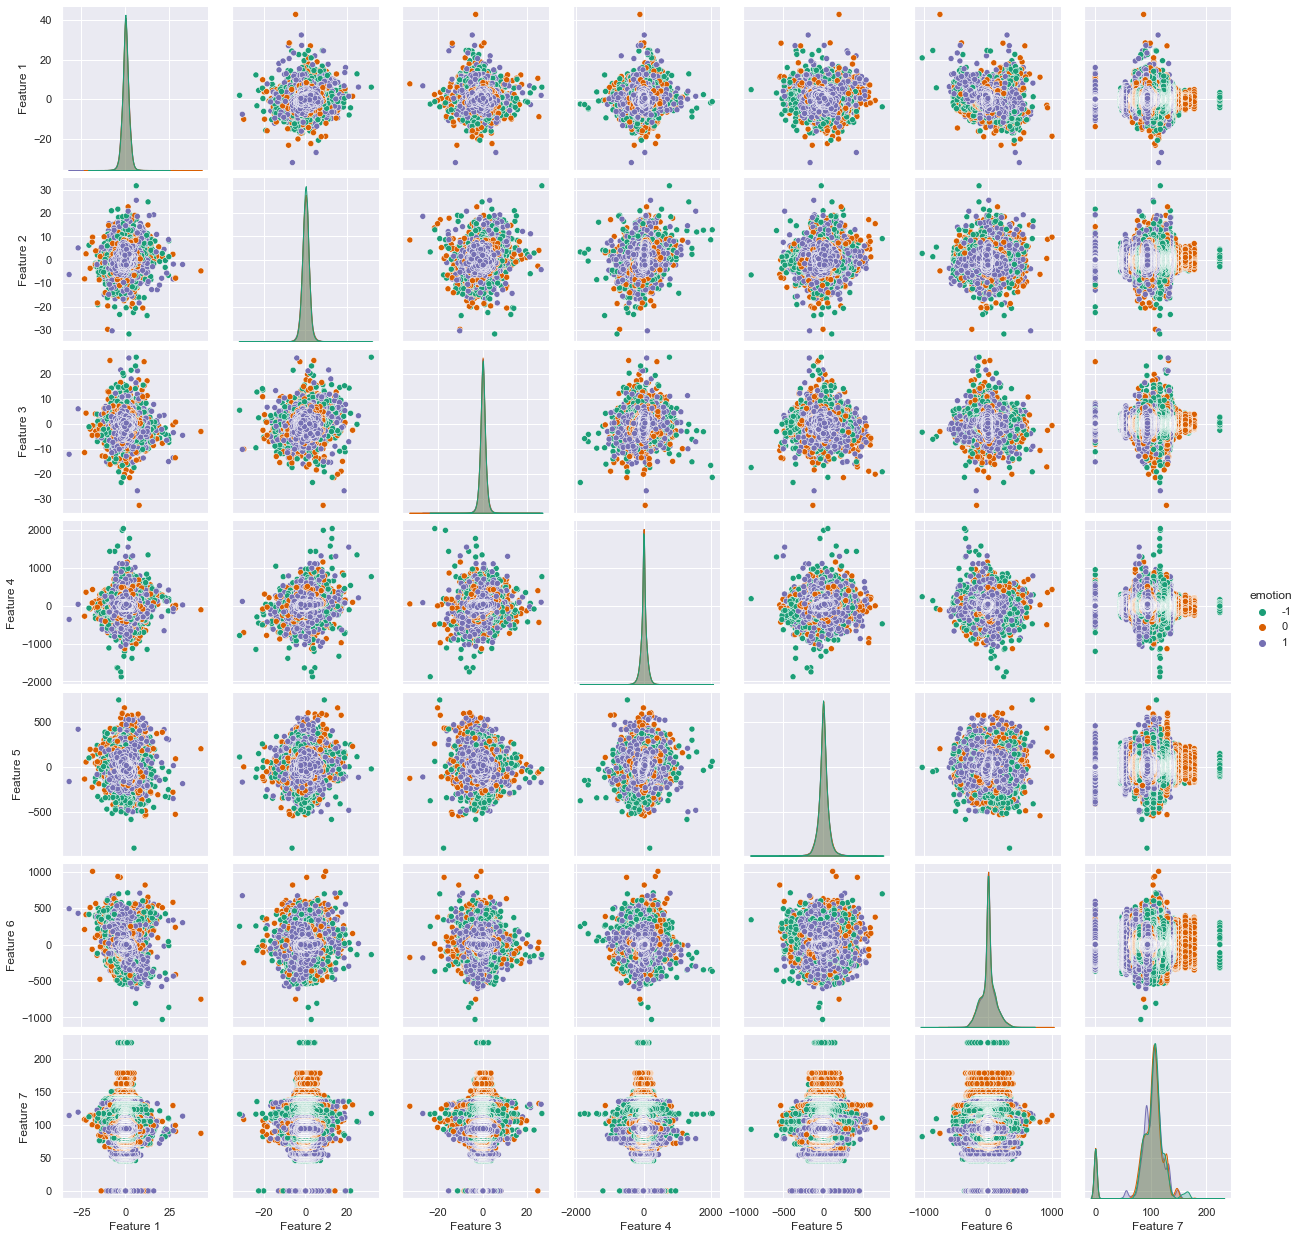

In [12]:
sns.pairplot(df[['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7'
                 'emotion']],hue='emotion', palette='Dark2')

### Observation
    
   This plot displays features in another way, like a correlation table and plot by using the function features_dist(data).   Along the diagonal, we have a histogram showing the distribution of each of the variables. As you can see in the previous diagram, all features except feature 7 have a normal distribution. In each subplot, three colors show distribution based on 'emotion'. Feature 7 is not correlated with other features. We can ignore the correlation between other features. Also, the     distribution of each emotion in every plot is equal.

   


#  Models Building

The target's model predicts emotions in three classes. We face a categorized dataset. There are a lot of models for categorized datasets in ML/DL. In recent years, Boosting algorithms have gained massive popularity in Kaggle competitions. The winners of these competitions use Boosting algorithms to achieve high performance. Boosting algorithms such as LightGBM, AdaBoost, Catboost, and XGBoost are widely used machine learning algorithms. "Boost" comes from a gradient-boosting machine learning algorithm, as this library is based on a gradient-boosting library. Gradient boosting is a robust machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, and forecasting, and it performs well. It can also return perfect results with relatively less data, unlike DL models that need to learn from the massive amount of data.



In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [49]:
from sklearn.model_selection import train_test_split


df['emotion'] = df['emotion'].map({-1:0, 0:1, 1:2})
X = df.drop('emotion', axis=1)
X = df.drop('# condition', axis=1)
y = df.emotion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. xgboost Model

In [50]:


from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)



C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [48]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1         2  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0       1.0        1.0           1.0
support    151575.0  150965.0  151758.0       1.0   454298.0      454298.0
_______________________________________________
Confusion Matrix: 
 [[151575      0      0]
 [     0 150965      0]
 [     0      0 151758]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1        2  accuracy  macro avg  weighted avg
precision      1.0      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0      1.0       1.0    

In [49]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["XGBClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df


Model  Training Accuracy %  Testing Accuracy %
0  XGBClassifier                100.0               100.0

## 2. AdaBoost

In [50]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:

from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)



In [52]:

#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))



AdaBoost Classifier Model Accuracy: 1.0


In [60]:
print_score(model1, X_train, y_train, X_test, y_test, train=True)
print_score(model1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1         2  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0       1.0        1.0           1.0
support    151575.0  150965.0  151758.0       1.0   454298.0      454298.0
_______________________________________________
Confusion Matrix: 
 [[151575      0      0]
 [     0 150965      0]
 [     0      0 151758]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1        2  accuracy  macro avg  weighted avg
precision      1.0      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0      1.0       1.0    

In [61]:
test_score = accuracy_score(y_test, model1.predict(X_test)) * 100
train_score = accuracy_score(y_train, model1.predict(X_train)) * 100

In [62]:
results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_10116\1656102691.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model  Training Accuracy %  Testing Accuracy %
0       XGBClassifier                100.0               100.0
1  AdaBoostClassifier                100.0               100.0
2  AdaBoostClassifier                100.0               100.0

## 3. LightGBM Classifier

In [63]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [65]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1         2  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0       1.0        1.0           1.0
support    151575.0  150965.0  151758.0       1.0   454298.0      454298.0
_______________________________________________
Confusion Matrix: 
 [[151575      0      0]
 [     0 150965      0]
 [     0      0 151758]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1        2  accuracy  macro avg  weighted avg
precision      1.0      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0      1.0       1.0    

In [66]:
test_score = accuracy_score(y_test, model1.predict(X_test)) * 100
train_score = accuracy_score(y_train, model1.predict(X_train)) * 100

In [67]:
results_df_2 = pd.DataFrame(data=[["LightGBM Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_10116\2886414215.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model  Training Accuracy %  Testing Accuracy %
0        XGBClassifier                100.0               100.0
1   AdaBoostClassifier                100.0               100.0
2   AdaBoostClassifier                100.0               100.0
3  LightGBM Classifier                100.0               100.0

## 4.Cat Boost 

In [69]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [70]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0         1         2  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0       1.0        1.0           1.0
support    151575.0  150965.0  151758.0       1.0   454298.0      454298.0
_______________________________________________
Confusion Matrix: 
 [[151575      0      0]
 [     0 150965      0]
 [     0      0 151758]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1        2  accuracy  macro avg  weighted avg
precision      1.0      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0      1.0       1.0    

In [71]:
test_score = accuracy_score(y_test, model1.predict(X_test)) * 100
train_score = accuracy_score(y_train, model1.predict(X_train)) * 100

In [72]:
results_df_2 = pd.DataFrame(data=[["CatBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_10116\751457895.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model  Training Accuracy %  Testing Accuracy %
0        XGBClassifier                100.0               100.0
1   AdaBoostClassifier                100.0               100.0
2   AdaBoostClassifier                100.0               100.0
3  LightGBM Classifier                100.0               100.0
4  CatBoost Classifier                100.0               100.0

## Here are a few strategies to boost  model's performance.

## 1) Collecting Date:
     a) Increce dataset size and add some context to the data.
     b) Electrocardiogram (ECG) and Photoplethysmogram (PPG) are derived from electrical signals
       of the heart activities and frequently used to diagnose and monitor cardiovascular disease.
       In the field of affective computing, these two signals can be used to recognize human emotions,
       this is supported by the wide availability of wearable devices that able to collect ECG or PPG 
       in the market.
       The findings suggest that despite the current trend where researchers favour ECG over PPG, the
       PPG signals can be used as the only modality in developing ERS with results comparable to those obtained 
       using ECG signals.
       
       Result: The result of using PPG signals in developing ERS is comparable to those obtained using ECG signals
       "https://www.sciencedirect.com/science/article/pii/S1319157822001409"
       


## 2) Preprocessing :
      convolution-augmented transformer: 
      "https://www.jorgegoncalves.com/docs/icmr22.pdf"
        ### Note: it can recognise users’ emotions
        on the dimensions of arousal and valence by learning both
        the global and local fine-grained associations and dependencies
        within and across multimodal physiological data (including blood
        volume pulse, electrodermal activity, heart rate, and skin temperature).


## 3) Model:
     a) Bayesian deep learning model
     "https://arxiv.org/pdf/1907.07327.pdf"
     
     b) GA-BP-adaboost
     "link.springer.com/chapter/10.1007/978-981-16-9423-3_10"
     
     c) Data Augmentation Convolutional Neural Network
     "https://www.sciencedirect.com/science/article/abs/pii/S1746809422001021"
    
     